<a href="https://colab.research.google.com/github/tjtrebat/air-quality-analysis/blob/Linear_regression_temp/Target_vs_predicted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Using Weather Data to Predict Air Quality

In [7]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Load the CSV file
file_path = '/content/houston-aqi-2010-2021.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

   Unnamed: 0  day_of_year  year   latitude  longitude  avg_pm10  aqi_pm10  \
0           0            2  2010  29.733726 -95.257593      13.0        12   
1           1            2  2010  29.733726 -95.257593      13.0        12   
2           2            2  2010  29.733726 -95.257593      13.0        12   
3           3            2  2010  29.733726 -95.257593      13.0        12   
4           4            2  2010  29.733726 -95.257593      13.0        12   

     avg_co  aqi_co    avg_no2  ...    avg_o3  aqi_o3  avg_pm25  aqi_pm25  \
0  0.297667     NaN  17.258333  ...  0.027294      32      11.6      48.0   
1  0.297667     NaN  17.258333  ...  0.027294      32      11.6      48.0   
2  0.297667     NaN  17.258333  ...  0.027294      32       9.7      40.0   
3  0.297667     NaN  17.258333  ...  0.027294      32       9.7      40.0   
4  0.325000     6.0  17.258333  ...  0.027294      32      11.6      48.0   

    avg_so2  aqi_so2  avg_humidity  avg_temperature  avg_wind  avg_p

#Linear Regression for Temperature Variable

Predictors: ['avg_temperature']
Coefficients: [[ 5.83901329e-01]
 [-2.57867647e-03]
 [-1.47718580e-01]
 [ 1.50490069e-04]
 [ 1.00137900e-01]
 [-1.32202044e-02]]
Intercept: [-4.56982625e+00  4.18896431e-01  2.43082748e+01  1.50207171e-02
  4.85850618e+00  1.60125311e+00]
Mean Squared Error on Test Set: 51.953679468669655


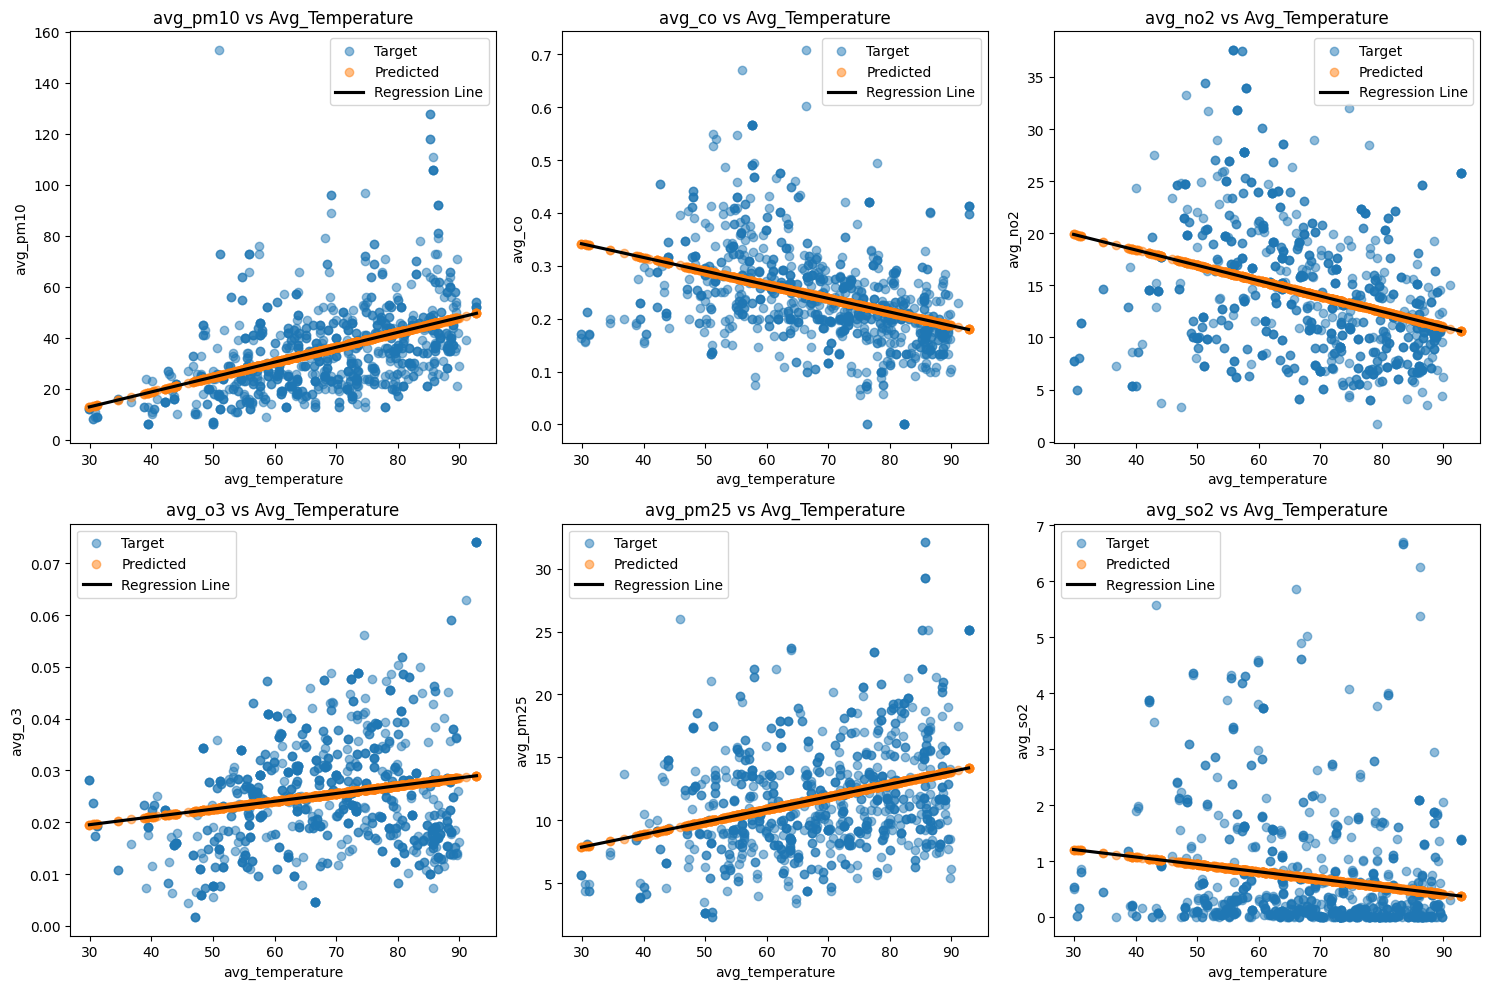

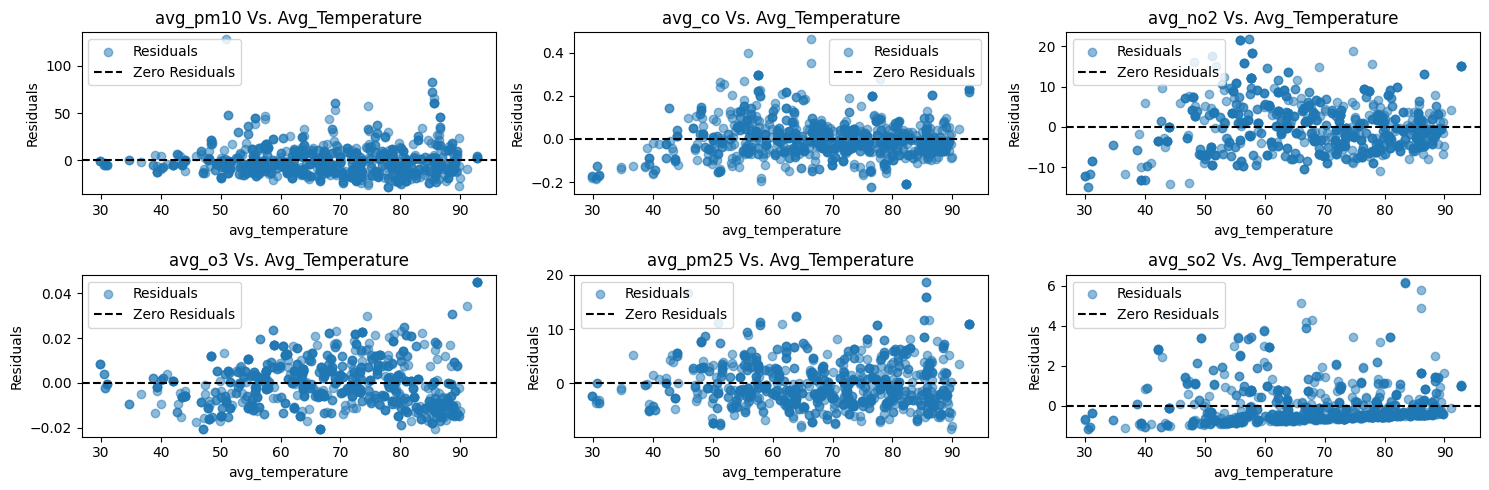


Metrics for avg_pm10 Vs. Avg_Temperature:
Mean Squared Error: 254.0535388385665
R-squared: 0.20825273843472192
Adjusted R-squared: 0.20741402311526713

Metrics for avg_co Vs. Avg_Temperature:
Mean Squared Error: 0.007694328943536798
R-squared: 0.14210248383263058
Adjusted R-squared: 0.14119369409092775

Metrics for avg_no2 Vs. Avg_Temperature:
Mean Squared Error: 38.118986789685756
R-squared: 0.09301730338408098
Adjusted R-squared: 0.09205651662919123

Metrics for avg_o3 Vs. Avg_Temperature:
Mean Squared Error: 0.00011308432030036783
R-squared: 0.04087195584350123
Adjusted R-squared: 0.039855930372996506

Metrics for avg_pm25 Vs. Avg_Temperature:
Mean Squared Error: 18.39546029193231
R-squared: 0.10253003211768663
Adjusted R-squared: 0.10157932240594691

Metrics for avg_so2 Vs. Avg_Temperature:
Mean Squared Error: 1.146283478569612
R-squared: 0.021870927676566287
Adjusted R-squared: 0.020834773998257505


In [8]:

# Temperature variable
predictors = ['avg_temperature']
dependent_variables = ['avg_pm10', 'avg_co', 'avg_no2', 'avg_o3', 'avg_pm25', 'avg_so2']

# Creating the model
model = LinearRegression()
X, Y = df[predictors], df[dependent_variables]

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# model fitting
model.fit(X_train, Y_train)

# Making predictions
Y_predictor = model.predict(X_test)

# Calculation for Mean Squared Error
mse = mean_squared_error(Y_test, Y_predictor)

# Print the results
print(f"Predictors: {predictors}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Mean Squared Error on Test Set:", mse)


# plots for target vs predicted
plt.figure(figsize=(15, 10))
for i, predictor in enumerate(predictors):
    for j, dependent_variable in enumerate(dependent_variables):
        plt.subplot(2, 3, j+1)
        plt.scatter(X_test[predictor], Y_test[dependent_variable], label='Target', alpha=0.5)
        plt.scatter(X_test[predictor], Y_predictor[:, j], label='Predicted', alpha=0.5)
        sns.regplot(x=X_test[predictor], y=Y_predictor[:, j], scatter=False, label='Regression Line', color='black')
        plt.title(f'{dependent_variable} vs Avg_Temperature')
        plt.xlabel(predictor)
        plt.ylabel(dependent_variable)
        plt.legend()

plt.tight_layout()
plt.show()

# Plots for residuals
residuals = Y_test - Y_predictor
plt.figure(figsize=(15, 5))
for i, dependent_variable in enumerate(dependent_variables):
    plt.subplot(2, 3, i+1)
    plt.scatter(X_test[predictor], residuals[dependent_variable], label='Residuals', alpha=0.5)
    plt.axhline(y=0, color='black', linestyle='--', label='Zero Residuals')
    plt.title(f'{dependent_variable} Vs. Avg_Temperature')
    plt.xlabel(predictor)
    plt.ylabel('Residuals')
    plt.legend()

plt.tight_layout()
plt.show()

# Model Evaluation for Temperature
for i, dependent_variable in enumerate(dependent_variables):
    Y_test_var = Y_test[dependent_variable]
    Y_predictor_var = Y_predictor[:, i]

    mse_var = mean_squared_error(Y_test_var, Y_predictor_var)
    r_squared_var = r2_score(Y_test_var, Y_predictor_var)
    adjusted_r_squared_var = 1 - ((1 - r_squared_var) * (len(Y_test_var) - 1) / (len(Y_test_var) - 1 - 1))

    print(f"\nMetrics for {dependent_variable} Vs. Avg_Temperature:")
    print(f"Mean Squared Error: {mse_var}")
    print(f"R-squared: {r_squared_var}")
    print(f"Adjusted R-squared: {adjusted_r_squared_var}")


#Linear Regression for Pressure Variable

Predictors: ['avg_pressure']
Coefficients: [[-1.01341205e+00]
 [ 4.56505313e-03]
 [ 2.65119781e-01]
 [-1.96849715e-04]
 [-1.49449542e-01]
 [ 2.37913583e-02]]
Intercept: [ 1.06714091e+03 -4.40522248e+00 -2.55716633e+02  2.25744675e-01
  1.63870494e+02 -2.35252019e+01]
Mean Squared Error on Test Set: 58.39241616732192


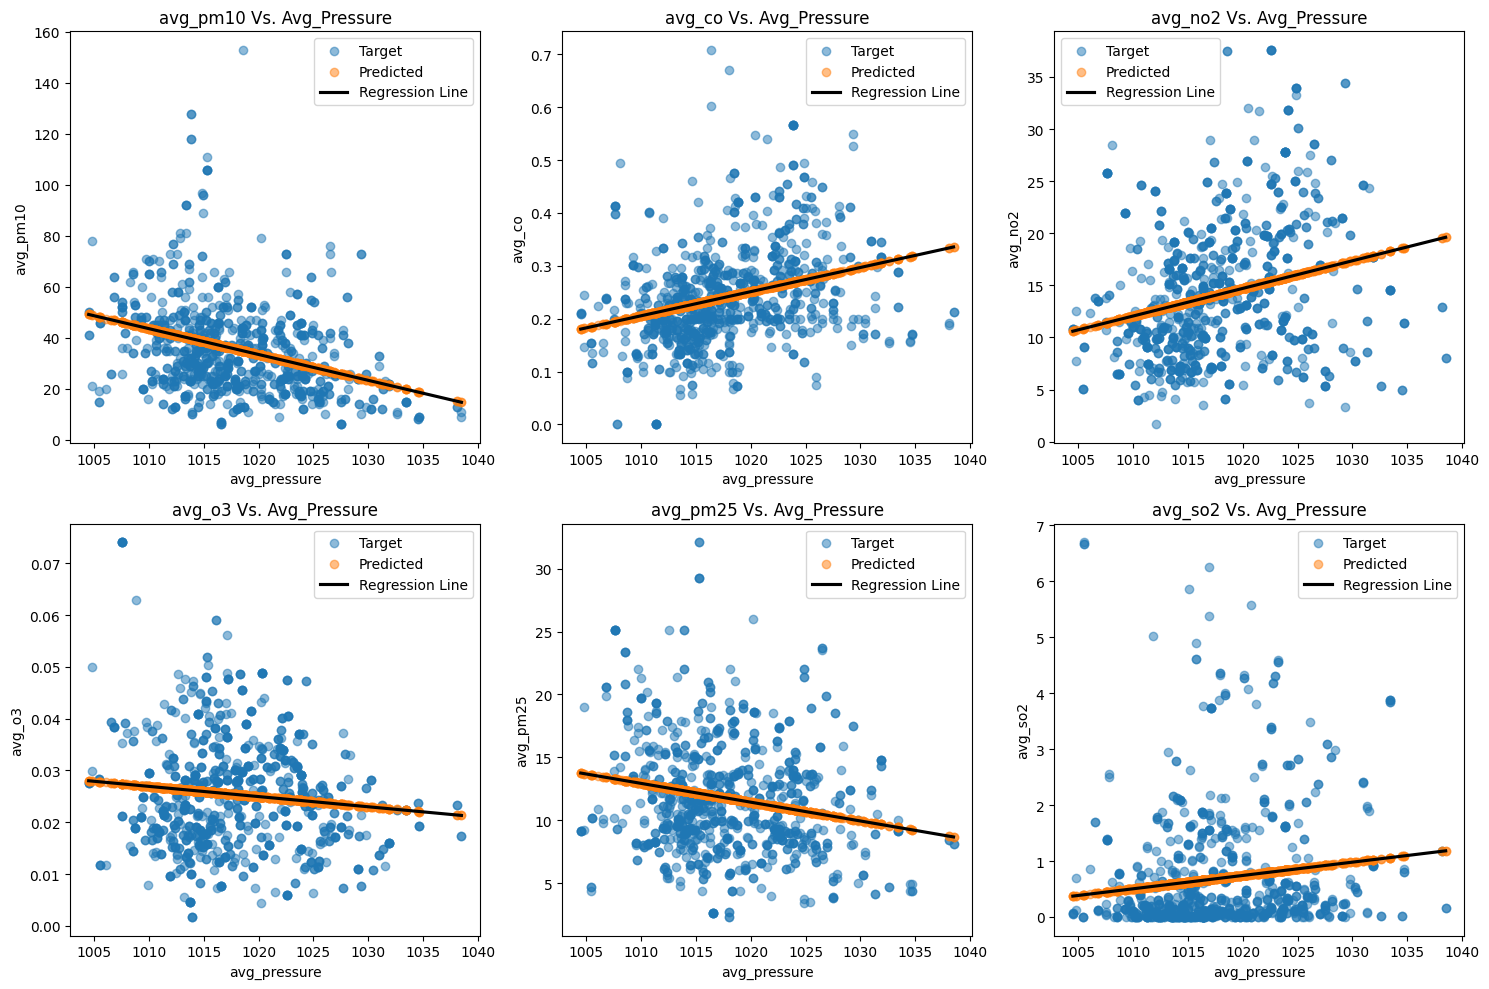

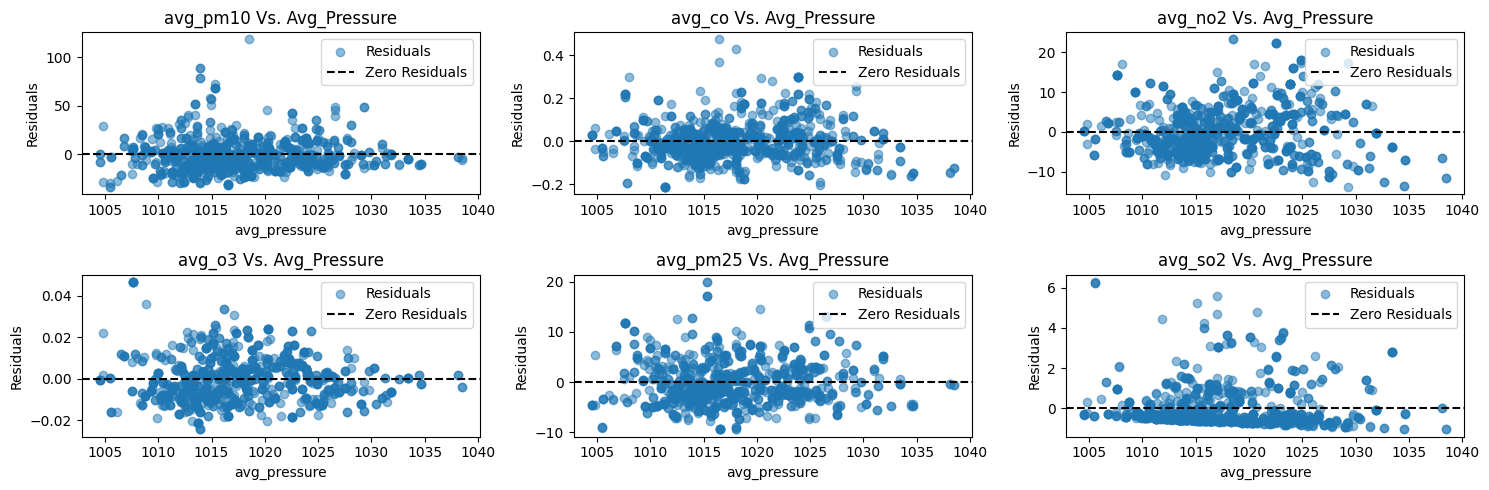


Metrics for avg_pm10 Vs. Avg_Pressure:
Mean Squared Error: 290.47077690907656
R-squared: 0.09475993432771568
Adjusted R-squared: 0.09380099358018146

Metrics for avg_co Vs. Avg_Pressure:
Mean Squared Error: 0.008015361033259743
R-squared: 0.10630824701166908
Adjusted R-squared: 0.10536153964621531

Metrics for avg_no2 Vs. Avg_Pressure:
Mean Squared Error: 38.90782259065107
R-squared: 0.07424816804755918
Adjusted R-squared: 0.07326749873405025

Metrics for avg_o3 Vs. Avg_Pressure:
Mean Squared Error: 0.00011647617276067788
R-squared: 0.012103857775762283
Adjusted R-squared: 0.011057357625101072

Metrics for avg_pm25 Vs. Avg_Pressure:
Mean Squared Error: 19.814551271467415
R-squared: 0.03329601918113556
Adjusted R-squared: 0.03227196835399693

Metrics for avg_so2 Vs. Avg_Pressure:
Mean Squared Error: 1.1532143955305756
R-squared: 0.015956743703647414
Adjusted R-squared: 0.014914324999943718


In [9]:
# pressure variable
predictors = ['avg_pressure']
dependent_variables = ['avg_pm10', 'avg_co', 'avg_no2', 'avg_o3', 'avg_pm25', 'avg_so2']

# Creating the model
model = LinearRegression()
X, Y = df[predictors], df[dependent_variables]

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# model fitting
model.fit(X_train, Y_train)

# Making predictions
Y_predictor = model.predict(X_test)

# Calculation for Mean Squared Error
mse = mean_squared_error(Y_test, Y_predictor)

# Print the results
print(f"Predictors: {predictors}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Mean Squared Error on Test Set:", mse)


# plots for target vs predicted
plt.figure(figsize=(15, 10))
for i, predictor in enumerate(predictors):
    for j, dependent_variable in enumerate(dependent_variables):
        plt.subplot(2, 3, j+1)
        plt.scatter(X_test[predictor], Y_test[dependent_variable], label='Target', alpha=0.5)
        plt.scatter(X_test[predictor], Y_predictor[:, j], label='Predicted', alpha=0.5)
        sns.regplot(x=X_test[predictor], y=Y_predictor[:, j], scatter=False, label='Regression Line', color='black')
        plt.title(f'{dependent_variable} Vs. Avg_Pressure')
        plt.xlabel(predictor)
        plt.ylabel(dependent_variable)
        plt.legend()

plt.tight_layout()
plt.show()

# Plots for residuals
residuals = Y_test - Y_predictor
plt.figure(figsize=(15, 5))
for i, dependent_variable in enumerate(dependent_variables):
    plt.subplot(2, 3, i+1)
    plt.scatter(X_test[predictor], residuals[dependent_variable], label='Residuals', alpha=0.5)
    plt.axhline(y=0, color='black', linestyle='--', label='Zero Residuals')
    plt.title(f'{dependent_variable} Vs. Avg_Pressure')
    plt.xlabel(predictor)
    plt.ylabel('Residuals')
    plt.legend()

plt.tight_layout()
plt.show()

# Model Evaluation for Pressure
for i, dependent_variable in enumerate(dependent_variables):
    Y_test_var = Y_test[dependent_variable]
    Y_predictor_var = Y_predictor[:, i]

    mse_var = mean_squared_error(Y_test_var, Y_predictor_var)
    r_squared_var = r2_score(Y_test_var, Y_predictor_var)
    adjusted_r_squared_var = 1 - ((1 - r_squared_var) * (len(Y_test_var) - 1) / (len(Y_test_var) - 1 - 1))

    print(f"\nMetrics for {dependent_variable} Vs. Avg_Pressure:")
    print(f"Mean Squared Error: {mse_var}")
    print(f"R-squared: {r_squared_var}")
    print(f"Adjusted R-squared: {adjusted_r_squared_var}")


#Linear Regression for Wind Variable

Predictors: ['avg_wind']
Coefficients: [[ 2.46050456e+00]
 [-1.87545828e-02]
 [-1.26297462e+00]
 [-3.93883216e-04]
 [-1.28161877e-01]
 [-6.87768942e-02]]
Intercept: [22.72259922  0.33963765 20.75487052  0.02743364 12.41746425  1.0516953 ]
Mean Squared Error on Test Set: 58.67790064354066


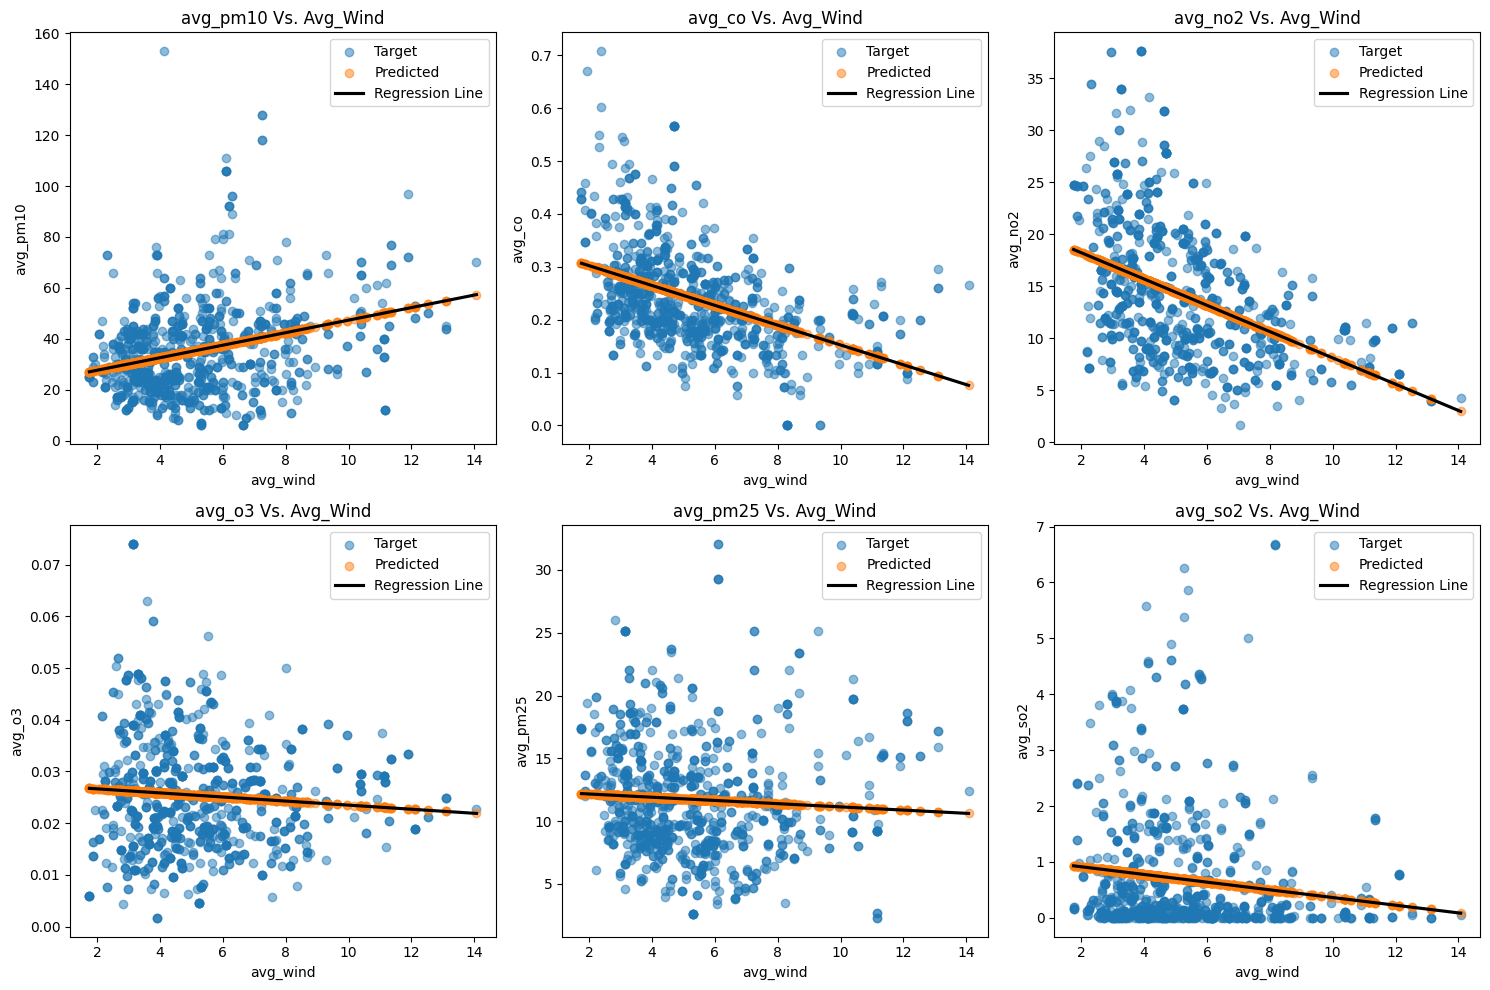

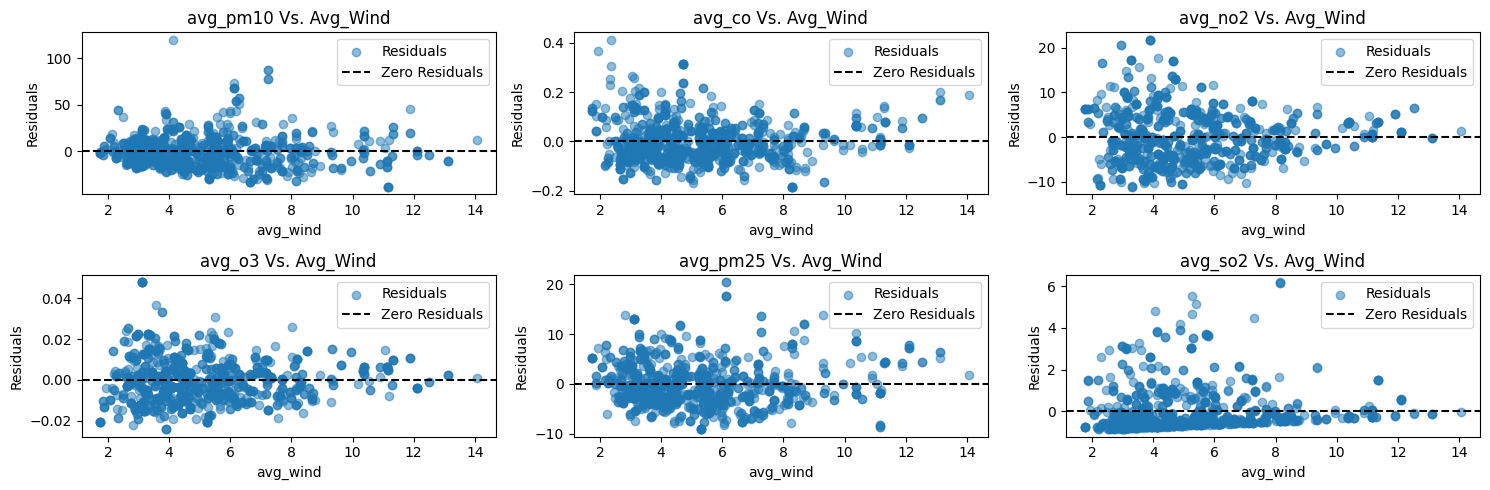


Metrics for avg_pm10 Vs. Avg_Wind:
Mean Squared Error: 296.75807288540034
R-squared: 0.07516583855301417
Adjusted R-squared: 0.07418614134809154

Metrics for avg_co Vs. Avg_Wind:
Mean Squared Error: 0.0071106950813312406
R-squared: 0.2071761302040792
Adjusted R-squared: 0.20633627440980395

Metrics for avg_no2 Vs. Avg_Wind:
Mean Squared Error: 33.70646317390016
R-squared: 0.19800652017537124
Adjusted R-squared: 0.19715695081115026

Metrics for avg_o3 Vs. Avg_Wind:
Mean Squared Error: 0.00011760355765999687
R-squared: 0.0025419090403115963
Adjusted R-squared: 0.0014852797066678969

Metrics for avg_pm25 Vs. Avg_Wind:
Mean Squared Error: 20.433871819990294
R-squared: 0.0030808691402608446
Adjusted R-squared: 0.0020248107389263525

Metrics for avg_so2 Vs. Avg_Wind:
Mean Squared Error: 1.1617676833141581
R-squared: 0.00865818309322075
Adjusted R-squared: 0.007608032863446579


In [10]:
# wind variable
predictors = ['avg_wind']
dependent_variables = ['avg_pm10', 'avg_co', 'avg_no2', 'avg_o3', 'avg_pm25', 'avg_so2']

# Creating the model
model = LinearRegression()
X, Y = df[predictors], df[dependent_variables]

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# model fitting
model.fit(X_train, Y_train)

# Making predictions
Y_predictor = model.predict(X_test)

# Calculation for Mean Squared Error
mse = mean_squared_error(Y_test, Y_predictor)

# Print the results
print(f"Predictors: {predictors}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Mean Squared Error on Test Set:", mse)


# plots for target vs predicted
plt.figure(figsize=(15, 10))
for i, predictor in enumerate(predictors):
    for j, dependent_variable in enumerate(dependent_variables):
        plt.subplot(2, 3, j+1)
        plt.scatter(X_test[predictor], Y_test[dependent_variable], label='Target', alpha=0.5)
        plt.scatter(X_test[predictor], Y_predictor[:, j], label='Predicted', alpha=0.5)
        sns.regplot(x=X_test[predictor], y=Y_predictor[:, j], scatter=False, label='Regression Line', color='black')
        plt.title(f'{dependent_variable} Vs. Avg_Wind')
        plt.xlabel(predictor)
        plt.ylabel(dependent_variable)
        plt.legend()

plt.tight_layout()
plt.show()

# Plots for residuals
residuals = Y_test - Y_predictor
plt.figure(figsize=(15, 5))
for i, dependent_variable in enumerate(dependent_variables):
    plt.subplot(2, 3, i+1)
    plt.scatter(X_test[predictor], residuals[dependent_variable], label='Residuals', alpha=0.5)
    plt.axhline(y=0, color='black', linestyle='--', label='Zero Residuals')
    plt.title(f'{dependent_variable} Vs. Avg_Wind')
    plt.xlabel(predictor)
    plt.ylabel('Residuals')
    plt.legend()

plt.tight_layout()
plt.show()

# Model Evaluation for Wind
for i, dependent_variable in enumerate(dependent_variables):
    Y_test_var = Y_test[dependent_variable]
    Y_predictor_var = Y_predictor[:, i]

    mse_var = mean_squared_error(Y_test_var, Y_predictor_var)
    r_squared_var = r2_score(Y_test_var, Y_predictor_var)
    adjusted_r_squared_var = 1 - ((1 - r_squared_var) * (len(Y_test_var) - 1) / (len(Y_test_var) - 1 - 1))

    print(f"\nMetrics for {dependent_variable} Vs. Avg_Wind:")
    print(f"Mean Squared Error: {mse_var}")
    print(f"R-squared: {r_squared_var}")
    print(f"Adjusted R-squared: {adjusted_r_squared_var}")

#Linear Regression for Humidity Variable

Predictors: ['avg_humidity']
Coefficients: [[-0.12582017]
 [-0.00131056]
 [-0.13855213]
 [-0.00021764]
 [ 0.02198946]
 [-0.01547422]]
Intercept: [4.38490272e+01 3.27473674e-01 2.32347354e+01 3.96483125e-02
 1.03045761e+01 1.70682986e+00]
Mean Squared Error on Test Set: 62.89243349517607


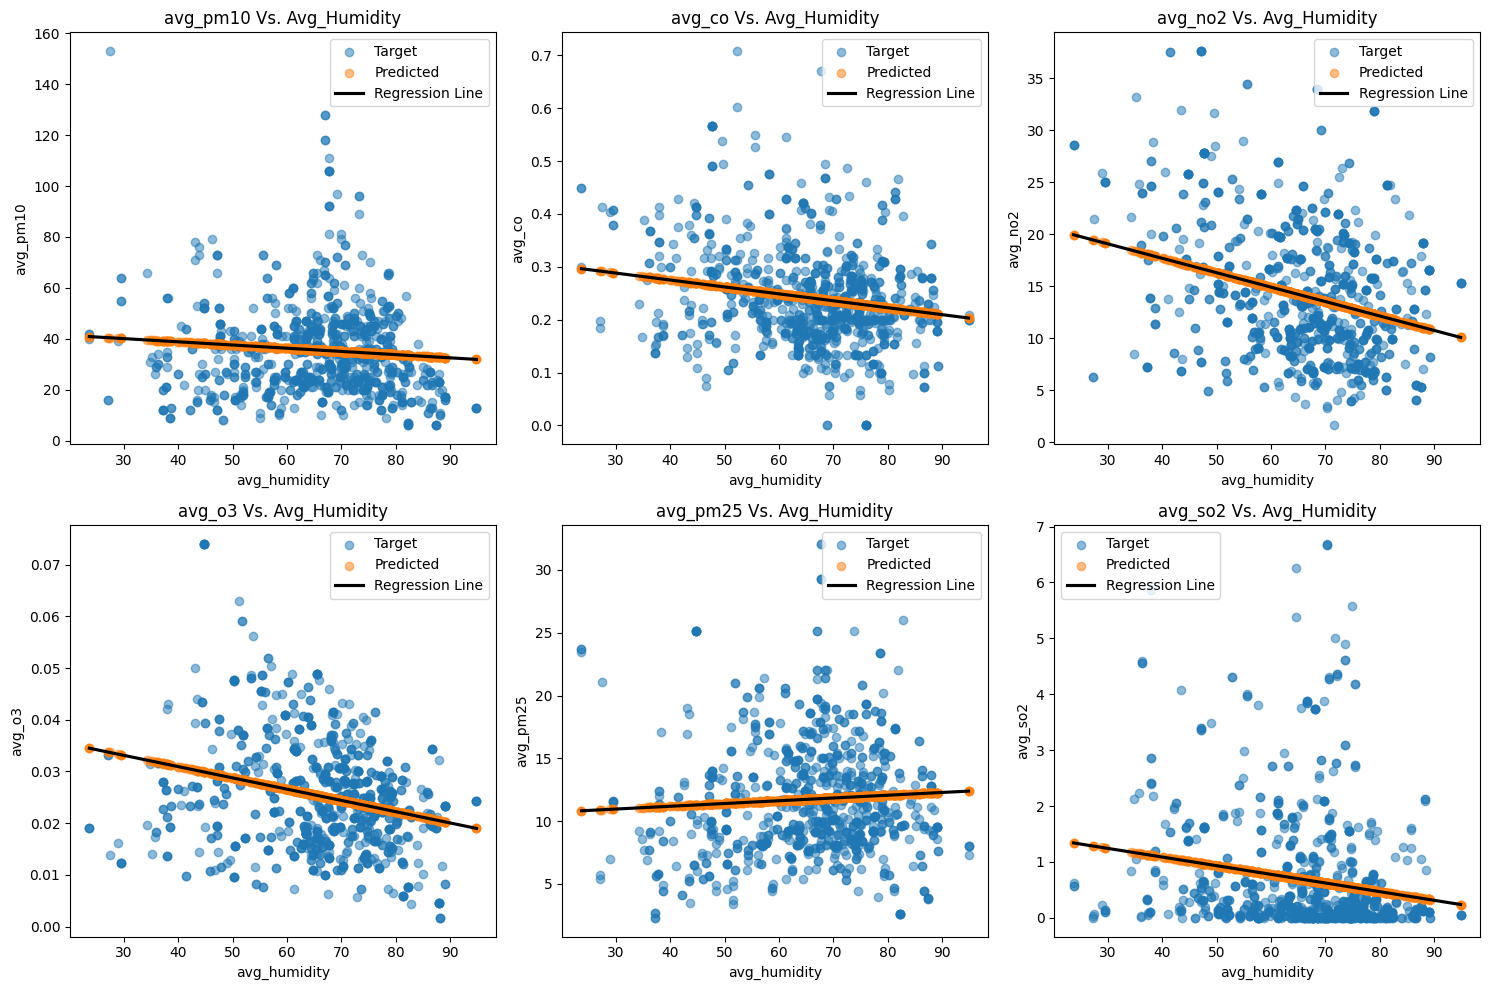

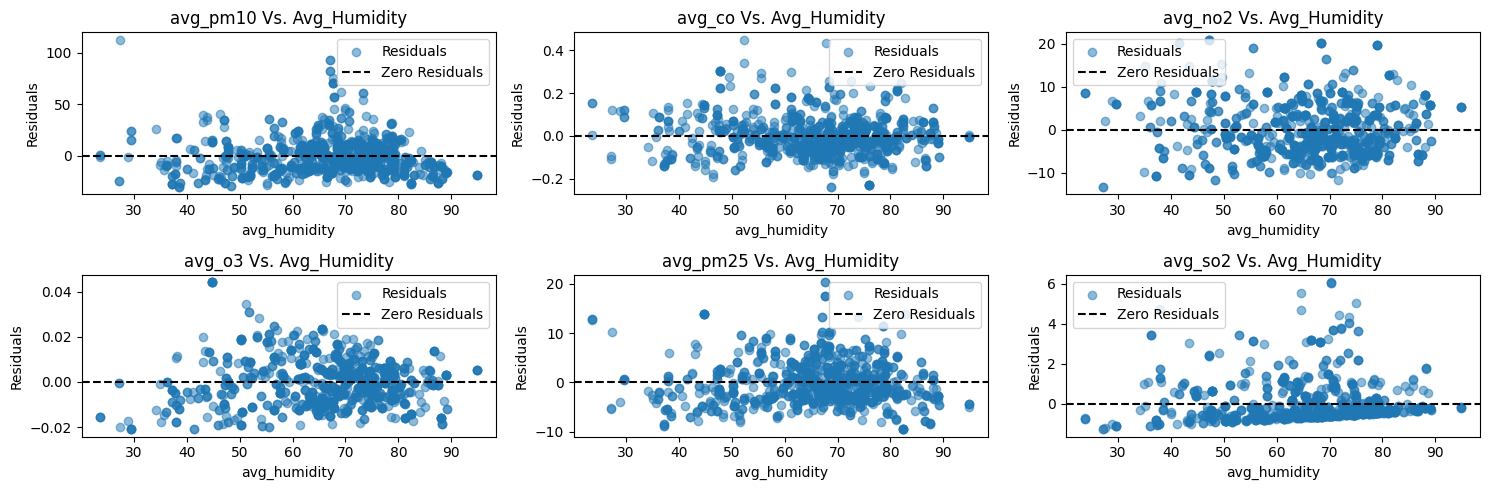


Metrics for avg_pm10 Vs. Avg_Humidity:
Mean Squared Error: 317.82442856752806
R-squared: 0.009513419386819155
Adjusted R-squared: 0.00846417512769504

Metrics for avg_co Vs. Avg_Humidity:
Mean Squared Error: 0.008390596302778521
R-squared: 0.06447049766915369
Adjusted R-squared: 0.06347947065397264

Metrics for avg_no2 Vs. Avg_Humidity:
Mean Squared Error: 37.88471280240263
R-squared: 0.09859149280063995
Adjusted R-squared: 0.09763661090742026

Metrics for avg_o3 Vs. Avg_Humidity:
Mean Squared Error: 0.00011066755916559199
R-squared: 0.06136978767583745
Adjusted R-squared: 0.06037547601023985

Metrics for avg_pm25 Vs. Avg_Humidity:
Mean Squared Error: 20.4955079575953
R-squared: 7.37912221827619e-05
Adjusted R-squared: -0.000985452643047946

Metrics for avg_so2 Vs. Avg_Humidity:
Mean Squared Error: 1.1414503796682698
R-squared: 0.025995033653140598
Adjusted R-squared: 0.024963248731162957


In [11]:
# Humidity variable
predictors = ['avg_humidity']
dependent_variables = ['avg_pm10', 'avg_co', 'avg_no2', 'avg_o3', 'avg_pm25', 'avg_so2']

# Creating the model
model = LinearRegression()
X, Y = df[predictors], df[dependent_variables]

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# model fitting
model.fit(X_train, Y_train)

# Making predictions
Y_predictor = model.predict(X_test)

# Calculation for Mean Squared Error
mse = mean_squared_error(Y_test, Y_predictor)

# Print the results
print(f"Predictors: {predictors}")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print(f"Mean Squared Error on Test Set:", mse)


# plots for target vs predicted
plt.figure(figsize=(15, 10))
for i, predictor in enumerate(predictors):
    for j, dependent_variable in enumerate(dependent_variables):
        plt.subplot(2, 3, j+1)
        plt.scatter(X_test[predictor], Y_test[dependent_variable], label='Target', alpha=0.5)
        plt.scatter(X_test[predictor], Y_predictor[:, j], label='Predicted', alpha=0.5)
        sns.regplot(x=X_test[predictor], y=Y_predictor[:, j], scatter=False, label='Regression Line', color='black')
        plt.title(f'{dependent_variable} Vs. Avg_Humidity')
        plt.xlabel(predictor)
        plt.ylabel(dependent_variable)
        plt.legend()

plt.tight_layout()
plt.show()

# Plots for residuals
residuals = Y_test - Y_predictor
plt.figure(figsize=(15, 5))
for i, dependent_variable in enumerate(dependent_variables):
    plt.subplot(2, 3, i+1)
    plt.scatter(X_test[predictor], residuals[dependent_variable], label='Residuals', alpha=0.5)
    plt.axhline(y=0, color='black', linestyle='--', label='Zero Residuals')
    plt.title(f'{dependent_variable} Vs. Avg_Humidity')
    plt.xlabel(predictor)
    plt.ylabel('Residuals')
    plt.legend()

plt.tight_layout()
plt.show()

# Model Evaluation for Humidity
for i, dependent_variable in enumerate(dependent_variables):
    Y_test_var = Y_test[dependent_variable]
    Y_predictor_var = Y_predictor[:, i]

    mse_var = mean_squared_error(Y_test_var, Y_predictor_var)
    r_squared_var = r2_score(Y_test_var, Y_predictor_var)
    adjusted_r_squared_var = 1 - ((1 - r_squared_var) * (len(Y_test_var) - 1) / (len(Y_test_var) - 1 - 1))

    print(f"\nMetrics for {dependent_variable} Vs. Avg_Humidity:")
    print(f"Mean Squared Error: {mse_var}")
    print(f"R-squared: {r_squared_var}")
    print(f"Adjusted R-squared: {adjusted_r_squared_var}")

# **Summary**

The analysis of the linear regression model shows the varying degrees of success in predicting air quality pollutants based on different predictors. In the avg_temperature model, the performance is mixed, with 'avg_co' demonstrating relatively better accuracy, while other pollutants shows limited accuracy. Similarly, the avg_pressure model performs better with 'avg_co,' but overall, the model has limited success in explaining the variance in most pollutants. Moving on to the avg_wind model, it predicts 'avg_co' but faces challenges with other pollutants, indicating potential benefits from additional features or advanced techniques. In the avg_humidity model, 'avg_no2' demonstrates the highest accuracy; however, overall, 'avg_humidity' has limited success in predicting most pollutants. Collectively, the models provide valuable insights into predictor-pollutant relationships, with 'avg_co' consistently performing better. The limited accuracy shows the importance of considering additional factors for more accurate predictions. In conclusion, while the models offer valuable insights, their effectiveness is moderate in predicting air quality pollutants.